<font color='blue'>

_EDA for loan data set using Python
Load the necessary libraries and read the Loan Dataset_

</font>

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
loan_ds = pd.read_csv("/Users/santoshnirwani/DS/EDA/loan.csv",sep = ',')

/Users/santoshnirwani/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_ds.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_ds.shape

(39717, 111)

In [5]:
loan_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


<font color='blue'>
    
 _Lets take only the columns where we have atleast 80% of the data and drop the remaining columns_
</font>

In [6]:
loan_n = loan_ds[[col for col in loan_ds if (loan_ds[col].count()/len(loan_ds)) >= 0.8]]

<font color='blue'>
    
_Below we have all the columns which we have dropped_
</font>

In [7]:
i = 0
for a in loan_ds.columns:
    if a not in loan_n.columns:
        print(a)
        i += 1
print("Total columns deleted:", i)

desc
mths_since_last_delinq
mths_since_last_record
next_pymnt_d
mths_since_last_major_derog
annual_inc_joint
dti_joint
verification_status_joint
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
tot_hi_cred_lim
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit
Total columns deleted: 58


In [8]:
loan_n.isnull().sum()
#loan_n.emp_title.head()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [9]:
loan_n=loan_n.dropna()
loan_n.shape

(36431, 53)

In [64]:
loan_g = loan_n.groupby("loan_status")
round(loan_g['loan_status'].count()/len(loan_n)*100,2)


loan_status
Charged Off    13.57
Current         2.93
Fully Paid     83.51
Name: loan_status, dtype: float64

Lets take all the categorical columns to find some insights and how they affect the defaulters

In [39]:
cat_loan = loan_n.select_dtypes(include = 'object')
cat_loan.columns


Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [40]:
cat_loan = cat_loan.drop(columns=['emp_title', 'application_type',
       'pymnt_plan', 'url','title', 'zip_code', 
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d'])
cat_loan['int_rate'] = cat_loan['int_rate'].str.replace("%","")
#sns.barplot(x='loan_status',y='loan_amnt',data=loan_n)
#cat_loan["loan_amnt"] = loan_n["loan_amnt"]

In [41]:
cat_loan['int_rate'] = cat_loan['int_rate'].astype('float64')
cat_loan['int_range'] = cat_loan['int_rate'].apply(lambda x: '<=10' if(x <= 10) else 
                                                  '>10 And <=15' if (x > 10 and x <= 15) else '>15')
cat_loan = cat_loan.drop(columns=['int_rate'])
cat_loan.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,int_range
1,60 months,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,GA,>15
3,36 months,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,CA,>10 And <=15
4,60 months,B,B5,1 year,RENT,Source Verified,Dec-11,Current,other,OR,>10 And <=15
5,36 months,A,A4,3 years,RENT,Source Verified,Dec-11,Fully Paid,wedding,AZ,<=10
6,60 months,C,C5,8 years,RENT,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,>15


term        loan_status
 36 months  Charged Off    10.0
            Fully Paid     90.0
 60 months  Charged Off    22.0
            Current        11.0
            Fully Paid     67.0
dtype: float64

grade  loan_status
A      Charged Off     6.0
       Current         0.0
       Fully Paid     94.0
B      Charged Off    11.0
       Current         3.0
       Fully Paid     86.0
C      Charged Off    16.0
       Current         3.0
       Fully Paid     81.0
D      Charged Off    20.0
       Current         4.0
       Fully Paid     76.0
E      Charged Off    24.0
       Current         6.0
       Fully Paid     69.0
F      Charged Off    30.0
       Current         7.0
       Fully Paid     64.0
G      Charged Off    31.0
       Current         5.0
       Fully Paid     63.0
dtype: float64

sub_grade  loan_status
A1         Charged Off     2.0
           Fully Paid     98.0
A2         Charged Off     5.0
           Fully Paid     95.0
A3         Charged Off     5.0
           Fully Paid     95.0
A4         Charged Off     6.0
           Current         0.0
           Fully Paid     94.0
A5         Charged Off     8.0
           Current         1.0
           Fully Paid     92.0
B1         Charged Off     9.0
           Current         2.0
           Fully Paid     90.0
B2         Charged Off    10.0
           Current         2.0
           Fully Paid     87.0
B3         Charged Off    11.0
           Current         3.0
           Fully Paid     85.0
B4         Charged Off    12.0
           Current         3.0
           Fully Paid     85.0
B5         Charged Off    13.0
           Current         3.0
           Fully Paid     84.0
C1         Charged Off    15.0
           Current         4.0
           Fully Paid     81.0
                          ... 
E5         Fully

emp_length  loan_status
1 year      Charged Off    13.0
            Current         2.0
            Fully Paid     84.0
10+ years   Charged Off    15.0
            Current         5.0
            Fully Paid     81.0
2 years     Charged Off    13.0
            Current         2.0
            Fully Paid     85.0
3 years     Charged Off    13.0
            Current         2.0
            Fully Paid     85.0
4 years     Charged Off    13.0
            Current         3.0
            Fully Paid     84.0
5 years     Charged Off    13.0
            Current         3.0
            Fully Paid     84.0
6 years     Charged Off    14.0
            Current         3.0
            Fully Paid     84.0
7 years     Charged Off    15.0
            Current         3.0
            Fully Paid     82.0
8 years     Charged Off    14.0
            Current         3.0
            Fully Paid     83.0
9 years     Charged Off    12.0
            Current         3.0
            Fully Paid     85.0
< 1 year    Char

home_ownership  loan_status
MORTGAGE        Charged Off    13.0
                Current         4.0
                Fully Paid     84.0
OTHER           Charged Off    19.0
                Fully Paid     81.0
OWN             Charged Off    13.0
                Current         3.0
                Fully Paid     84.0
RENT            Charged Off    14.0
                Current         2.0
                Fully Paid     83.0
dtype: float64

verification_status  loan_status
Not Verified         Charged Off    12.0
                     Current         1.0
                     Fully Paid     87.0
Source Verified      Charged Off    14.0
                     Current         3.0
                     Fully Paid     83.0
Verified             Charged Off    16.0
                     Current         5.0
                     Fully Paid     80.0
dtype: float64

issue_d  loan_status
Apr-08   Charged Off     17.0
         Fully Paid      83.0
Apr-09   Charged Off     13.0
         Fully Paid      87.0
Apr-10   Charged Off      9.0
         Fully Paid      91.0
Apr-11   Charged Off     14.0
         Current          0.0
         Fully Paid      86.0
Aug-08   Charged Off      6.0
         Fully Paid      94.0
Aug-09   Charged Off     10.0
         Fully Paid      90.0
Aug-10   Charged Off     13.0
         Fully Paid      87.0
Aug-11   Charged Off     14.0
         Current          7.0
         Fully Paid      80.0
Dec-07   Fully Paid     100.0
Dec-08   Charged Off     15.0
         Fully Paid      85.0
Dec-09   Charged Off     11.0
         Fully Paid      89.0
Dec-10   Charged Off     11.0
         Fully Paid      89.0
Dec-11   Charged Off     18.0
         Current         10.0
         Fully Paid      72.0
Feb-08   Charged Off     33.0
         Fully Paid      67.0
                        ...  
May-11   Fully Paid      79.0
Nov-07   Fully Paid

loan_status  loan_status
Charged Off  Charged Off    100.0
Current      Current        100.0
Fully Paid   Fully Paid     100.0
dtype: float64

purpose             loan_status
car                 Charged Off    10.0
                    Current         3.0
                    Fully Paid     86.0
credit_card         Charged Off    10.0
                    Current         2.0
                    Fully Paid     88.0
debt_consolidation  Charged Off    14.0
                    Current         3.0
                    Fully Paid     82.0
educational         Charged Off    16.0
                    Fully Paid     84.0
home_improvement    Charged Off    11.0
                    Current         3.0
                    Fully Paid     86.0
house               Charged Off    15.0
                    Current         4.0
                    Fully Paid     81.0
major_purchase      Charged Off     9.0
                    Current         2.0
                    Fully Paid     89.0
medical             Charged Off    15.0
                    Current         2.0
                    Fully Paid     83.0
moving              Charged Off    15.0
        

addr_state  loan_status
AK          Charged Off    20.0
            Current         3.0
            Fully Paid     77.0
AL          Charged Off    11.0
            Current         4.0
            Fully Paid     85.0
AR          Charged Off    11.0
            Current         4.0
            Fully Paid     85.0
AZ          Charged Off    14.0
            Current         3.0
            Fully Paid     83.0
CA          Charged Off    15.0
            Current         2.0
            Fully Paid     83.0
CO          Charged Off    11.0
            Current         4.0
            Fully Paid     85.0
CT          Charged Off    12.0
            Current         4.0
            Fully Paid     85.0
DC          Charged Off     7.0
            Current         1.0
            Fully Paid     92.0
DE          Charged Off    10.0
            Current         1.0
            Fully Paid     89.0
FL          Charged Off    17.0
            Current         3.0
            Fully Paid     80.0
                

int_range     loan_status
<=10          Charged Off     6.0
              Current         1.0
              Fully Paid     93.0
>10 And <=15  Charged Off    14.0
              Current         3.0
              Fully Paid     84.0
>15           Charged Off    24.0
              Current         6.0
              Fully Paid     70.0
dtype: float64

36431

36431

<Figure size 1152x864 with 0 Axes>

(array([0, 1]), <a list of 2 Text xticklabel objects>)

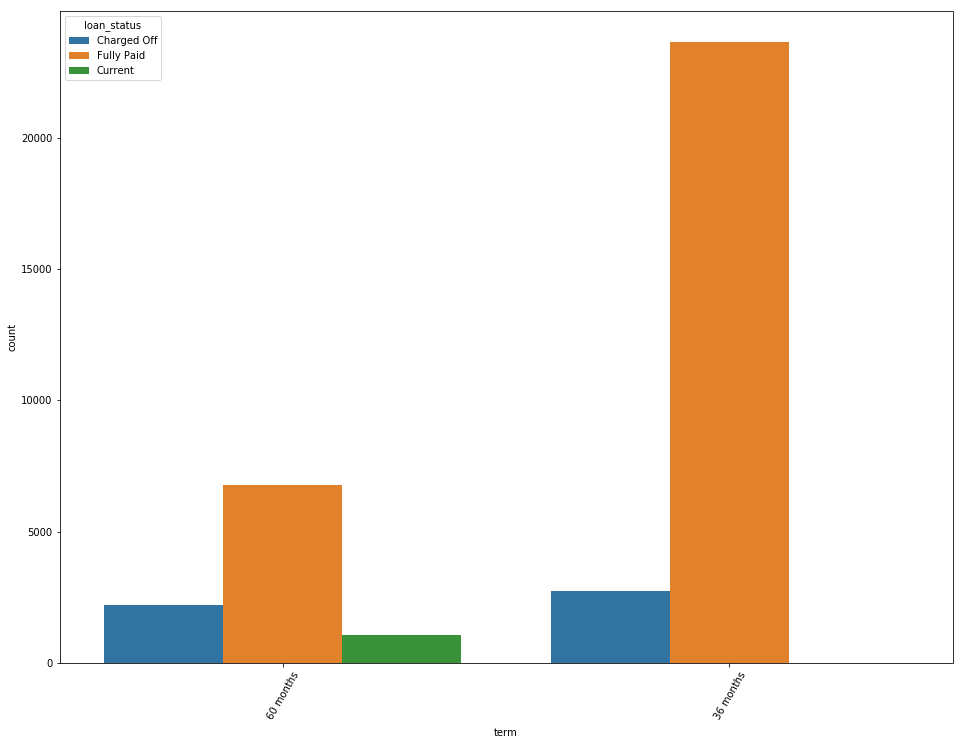

<Figure size 1152x864 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

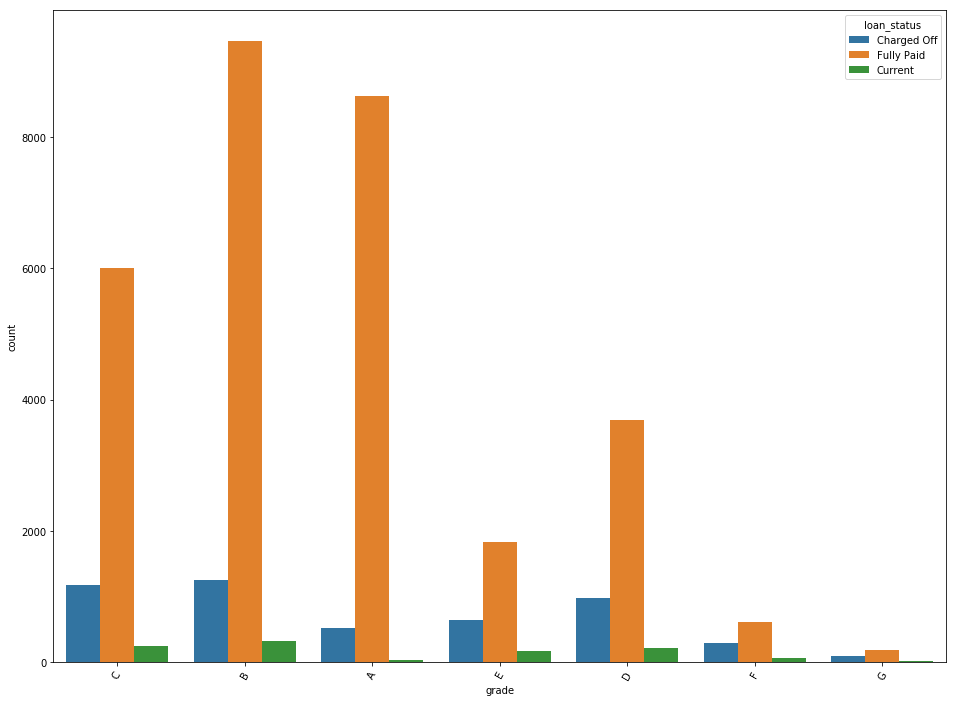

<Figure size 1152x864 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

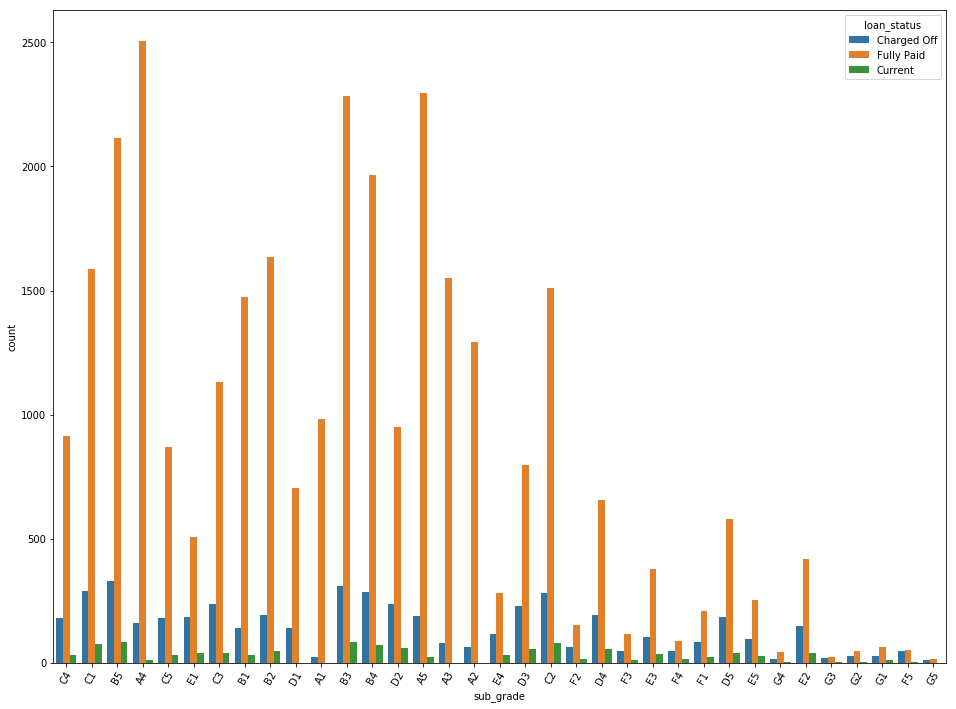

<Figure size 1152x864 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

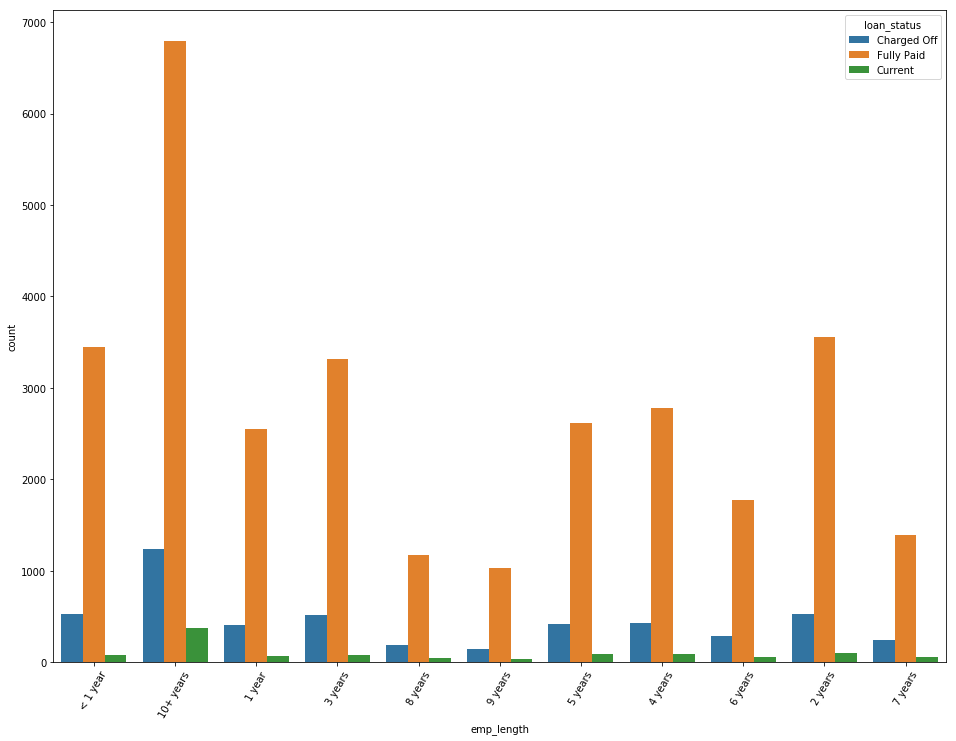

<Figure size 1152x864 with 0 Axes>

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

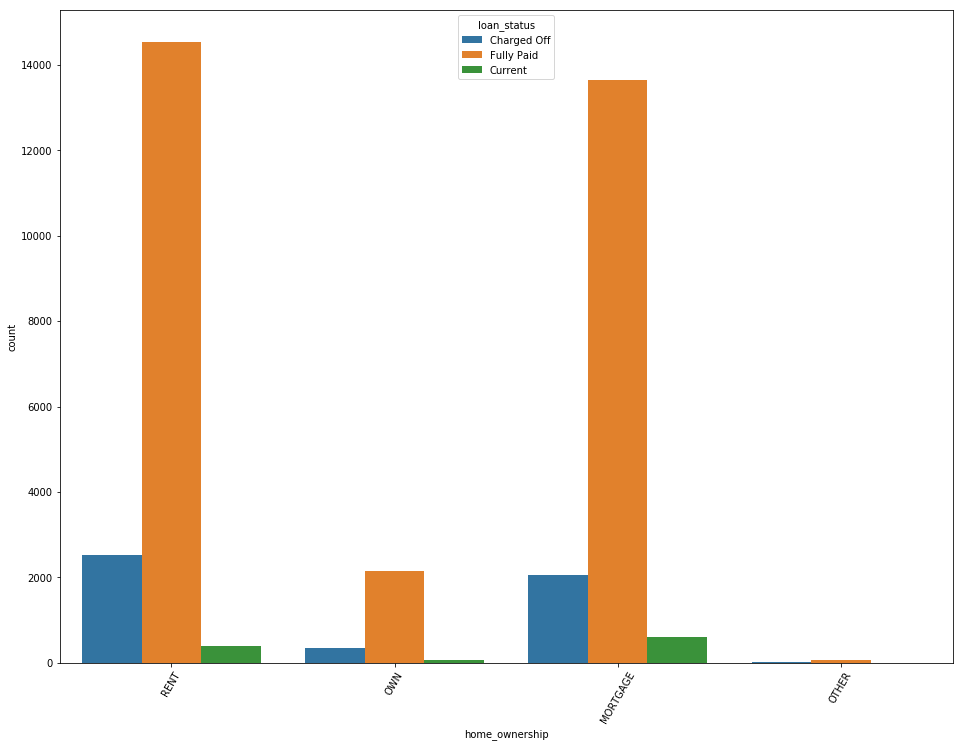

<Figure size 1152x864 with 0 Axes>

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

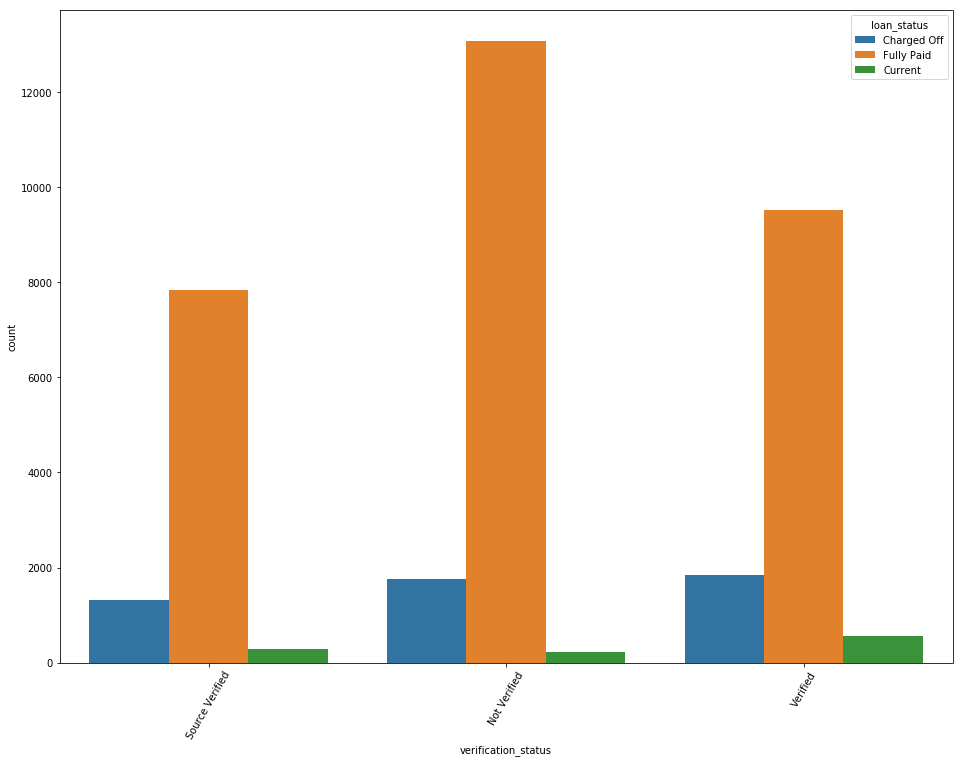

<Figure size 1152x864 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

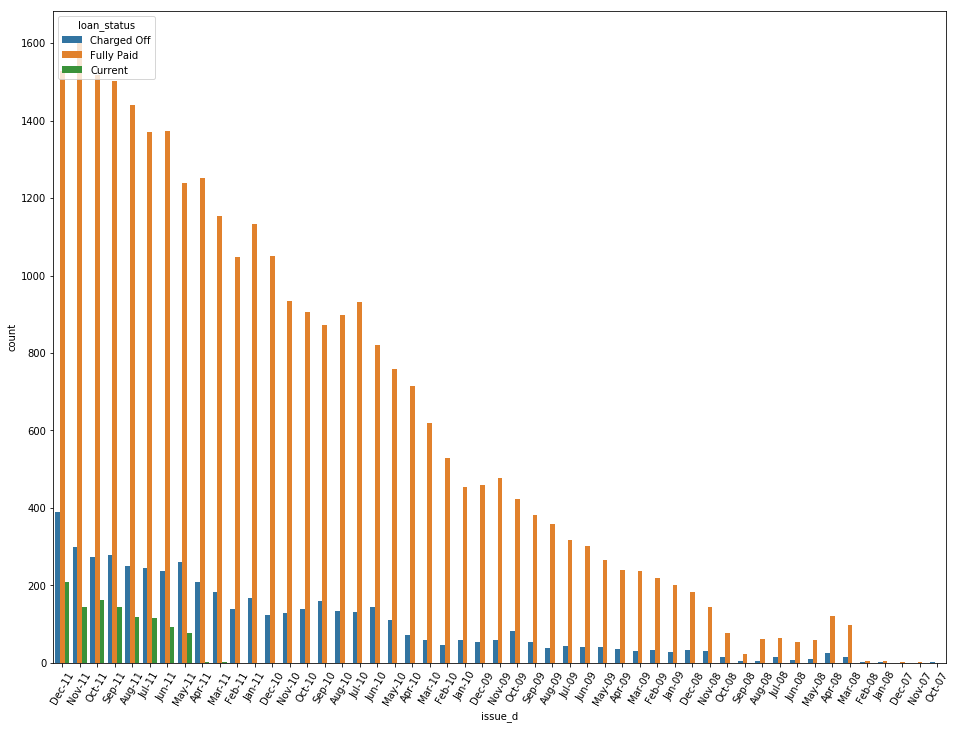

<Figure size 1152x864 with 0 Axes>

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

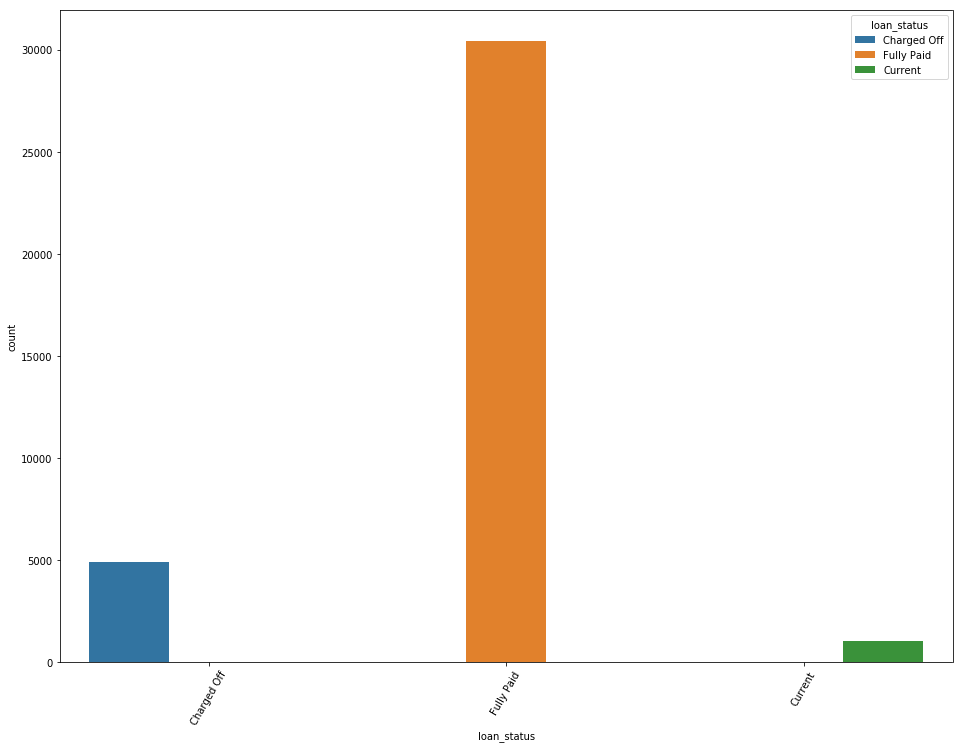

<Figure size 1152x864 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

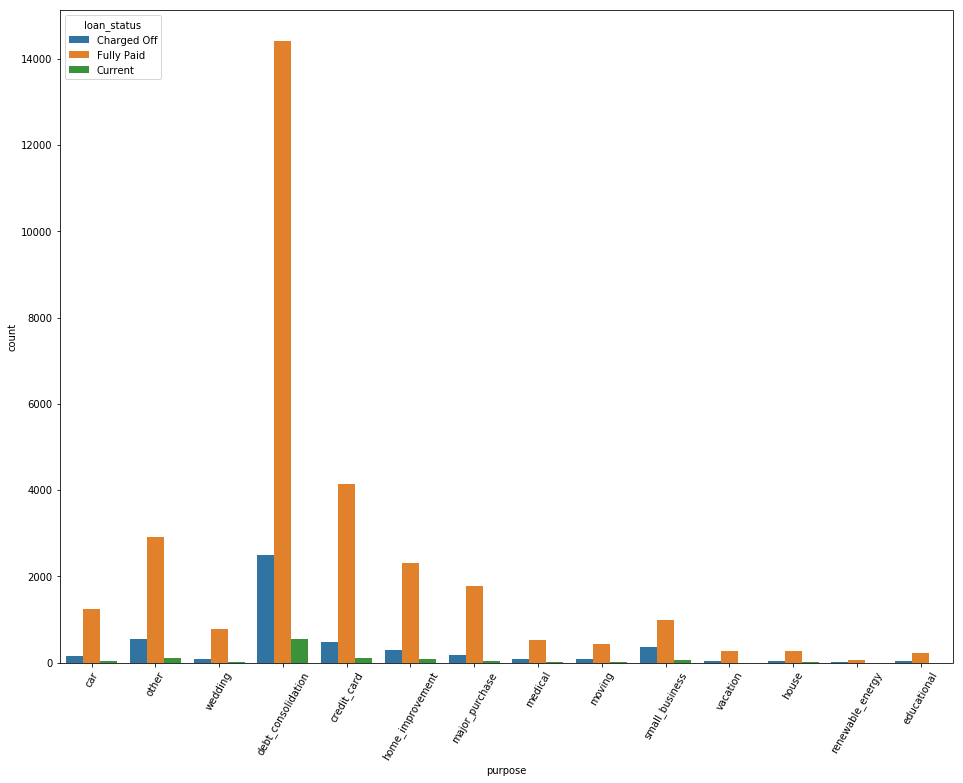

<Figure size 1152x864 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

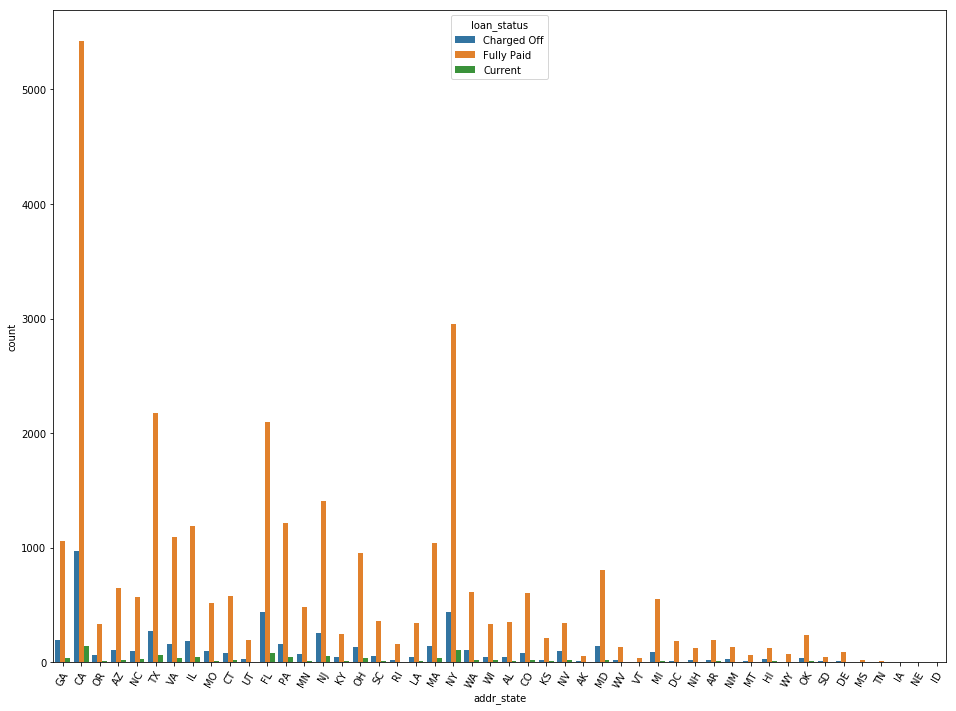

<Figure size 1152x864 with 0 Axes>

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

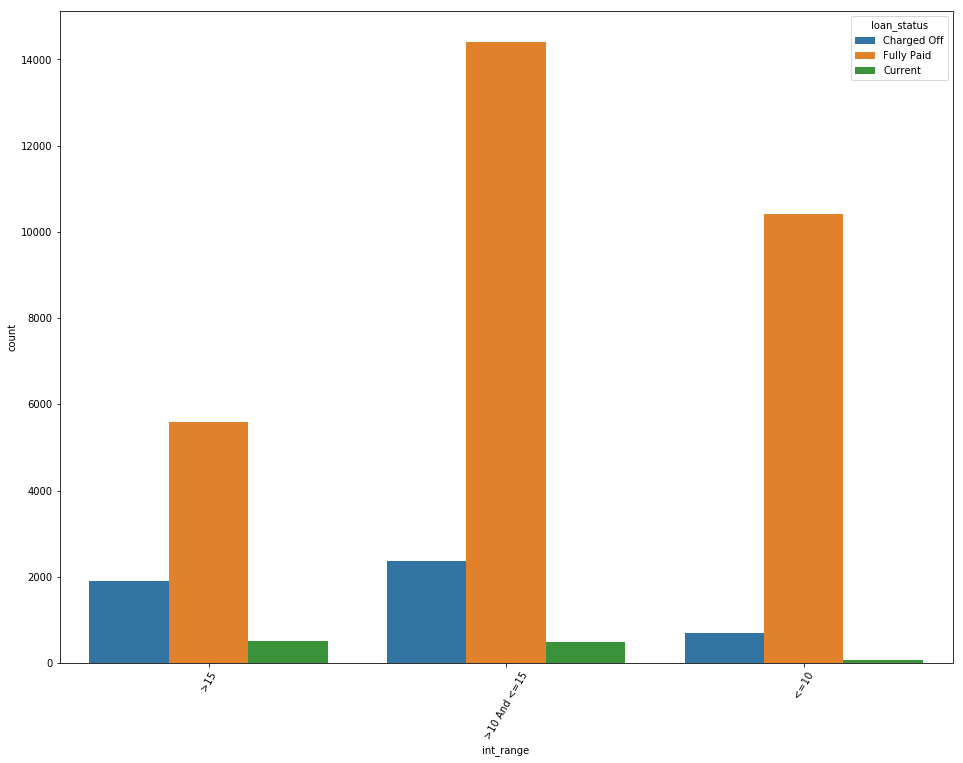

In [74]:
for a in cat_loan.columns:
    round(cat_loan.groupby([a,'loan_status']).size()/cat_loan.groupby([a]).size(),2)*100
2729+ 23646+ 2213+ 1066+  6777
len(cat_loan)
i = 0
for col in cat_loan.columns:
    plt.figure(figsize=(16,12))
    sns.countplot(x=col,hue='loan_status',data=cat_loan)
    plt.xticks(rotation=60)
    plt.show()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 23 columns):
loan_amnt                  36431 non-null int64
funded_amnt                36431 non-null int64
funded_amnt_inv            36431 non-null float64
installment                36431 non-null float64
annual_inc                 36431 non-null float64
dti                        36431 non-null float64
delinq_2yrs                36431 non-null int64
inq_last_6mths             36431 non-null int64
open_acc                   36431 non-null int64
pub_rec                    36431 non-null int64
revol_bal                  36431 non-null int64
total_acc                  36431 non-null int64
out_prncp_inv              36431 non-null float64
total_pymnt                36431 non-null float64
total_pymnt_inv            36431 non-null float64
total_rec_prncp            36431 non-null float64
total_rec_int              36431 non-null float64
total_rec_late_fee         36431 non-null float64
recover

<Figure size 864x864 with 0 Axes>

/Users/santoshnirwani/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]), <a list of 10 Text xticklabel objects>)

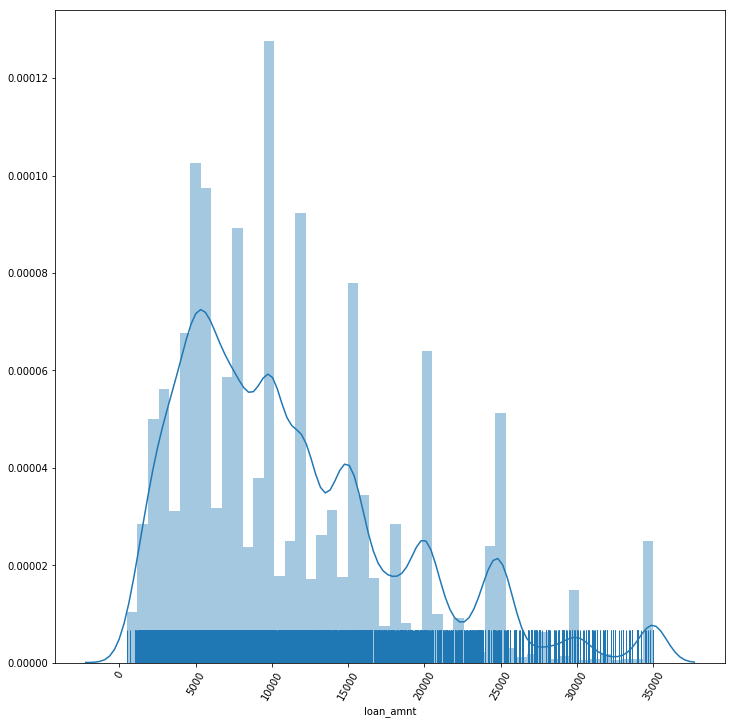

<Figure size 864x864 with 0 Axes>

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]), <a list of 10 Text xticklabel objects>)

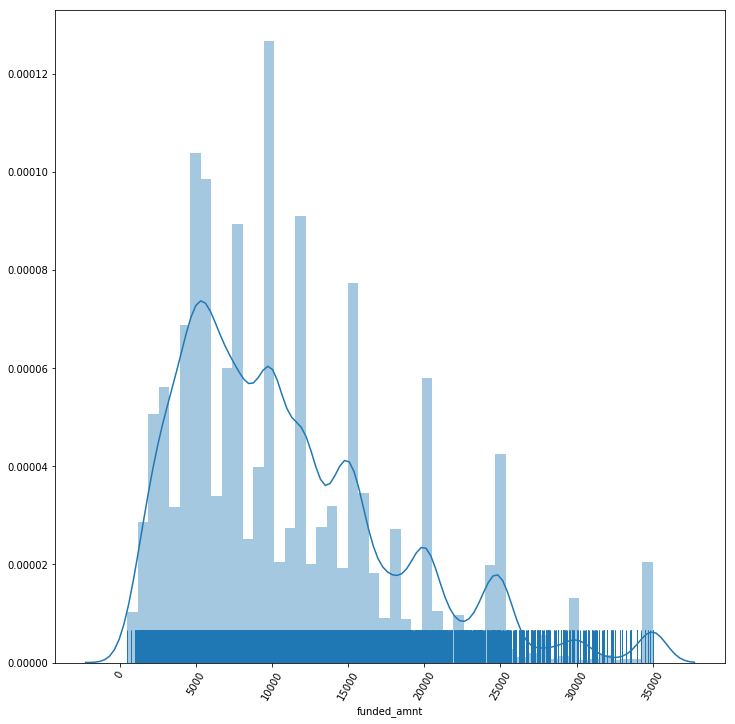

<Figure size 864x864 with 0 Axes>

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]), <a list of 10 Text xticklabel objects>)

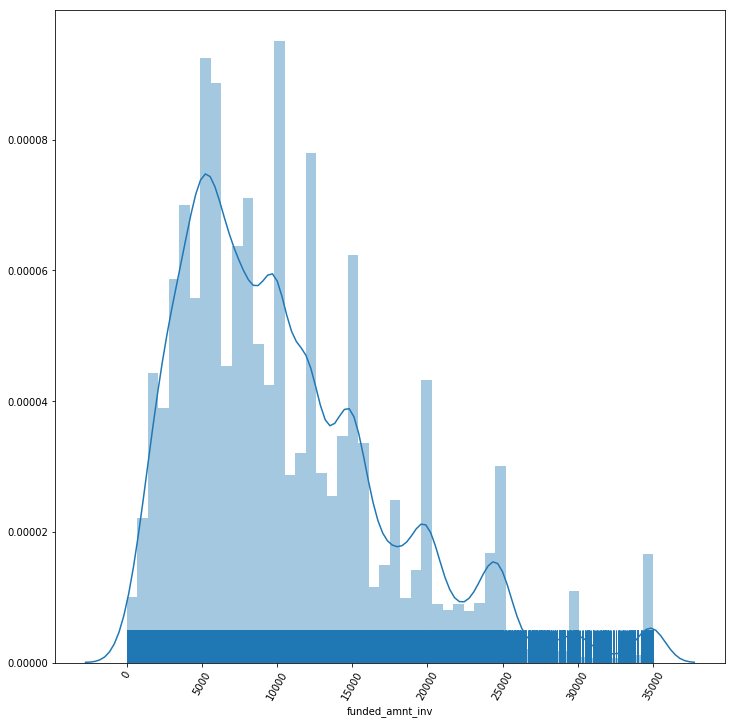

<Figure size 864x864 with 0 Axes>

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]), <a list of 10 Text xticklabel objects>)

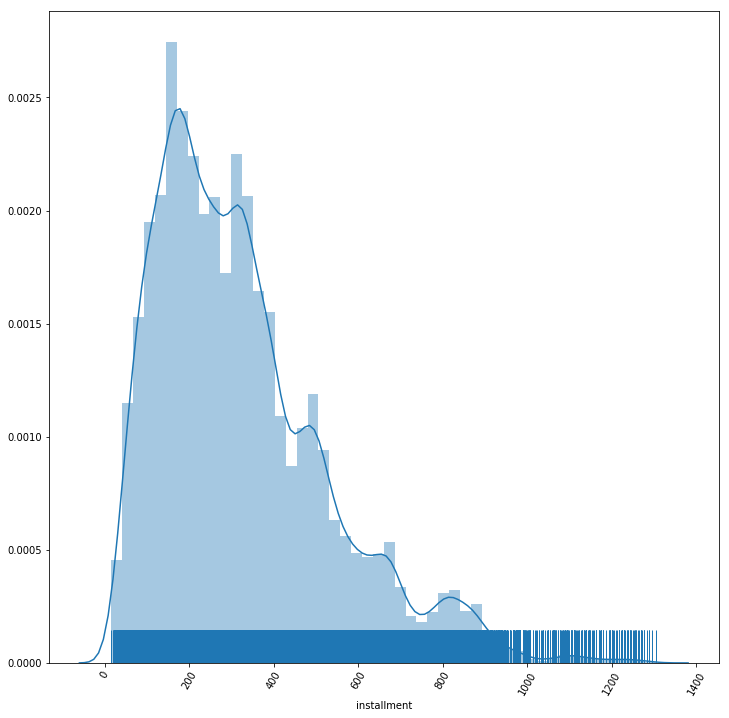

<Figure size 864x864 with 0 Axes>

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.]),
 <a list of 9 Text xticklabel objects>)

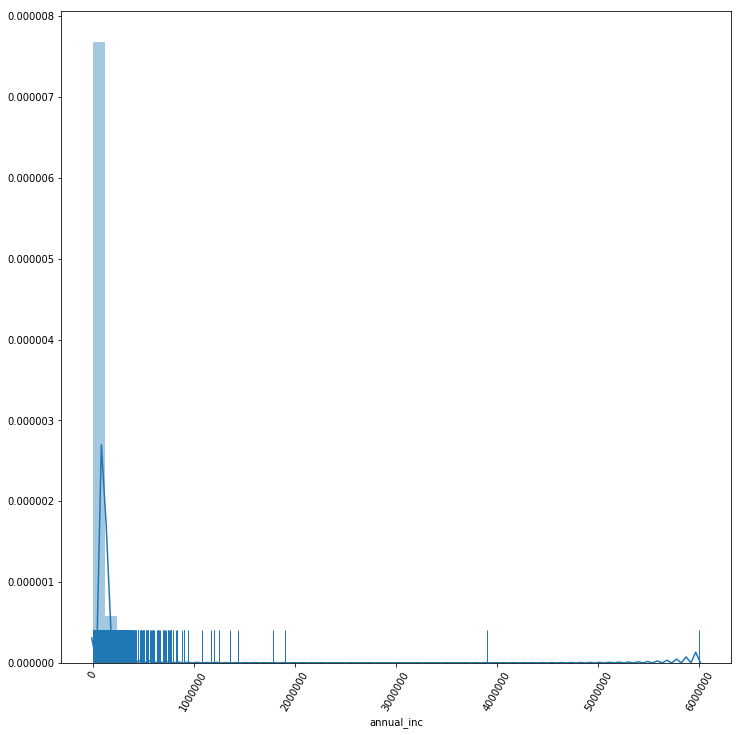

<Figure size 864x864 with 0 Axes>

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text xticklabel objects>)

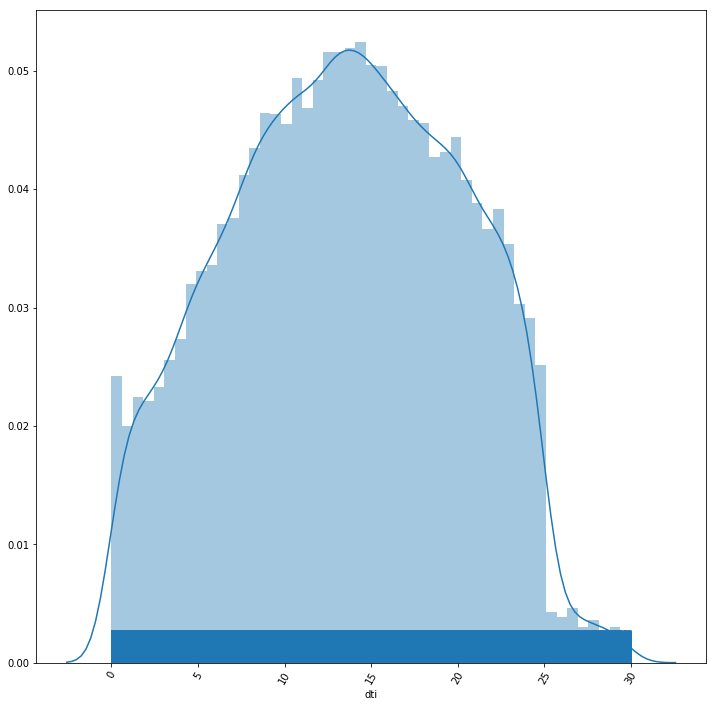

<Figure size 864x864 with 0 Axes>

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text xticklabel objects>)

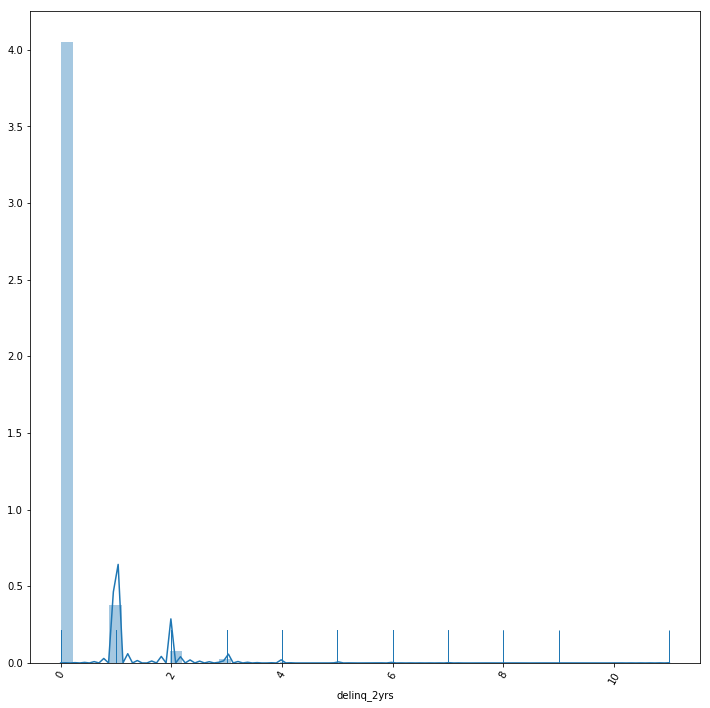

<Figure size 864x864 with 0 Axes>

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 7 Text xticklabel objects>)

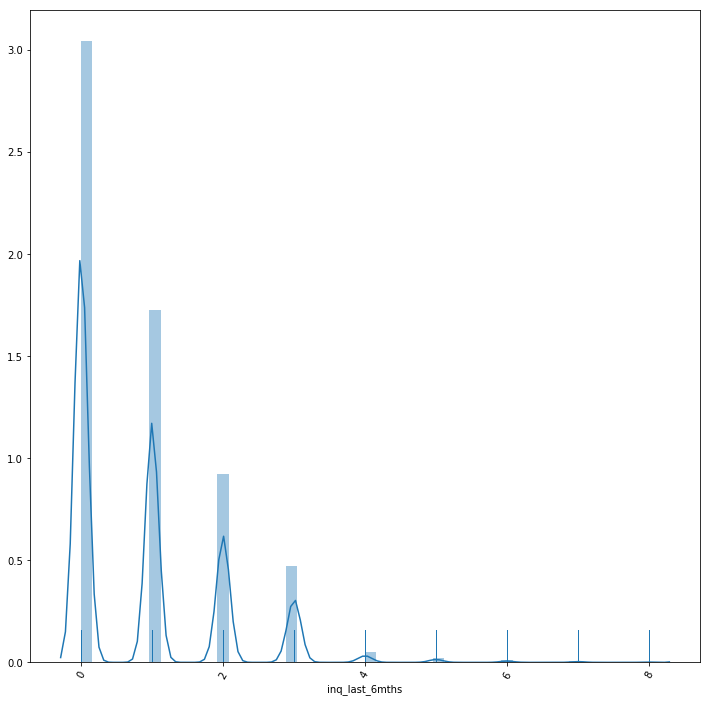

<Figure size 864x864 with 0 Axes>

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 7 Text xticklabel objects>)

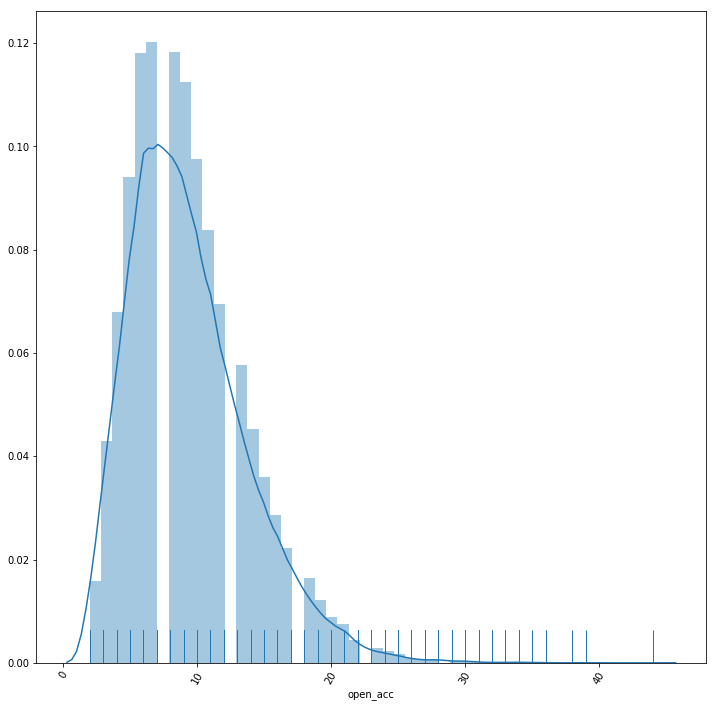

<Figure size 864x864 with 0 Axes>

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text xticklabel objects>)

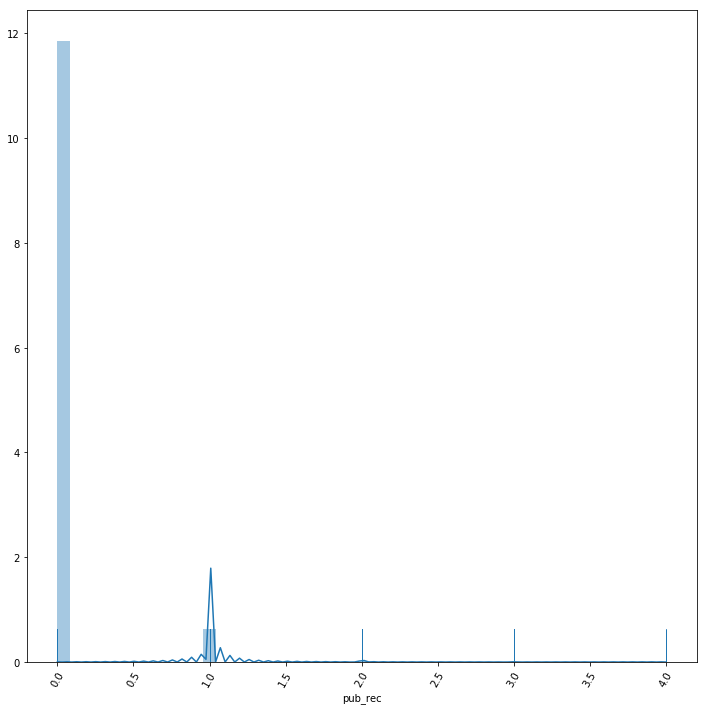

<Figure size 864x864 with 0 Axes>

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000., 180000.]),
 <a list of 11 Text xticklabel objects>)

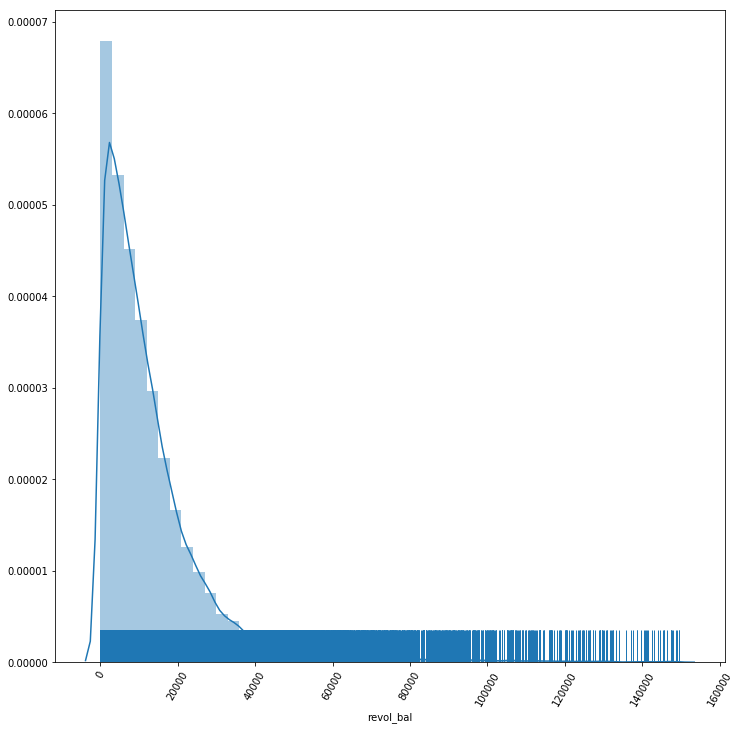

<Figure size 864x864 with 0 Axes>

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 7 Text xticklabel objects>)

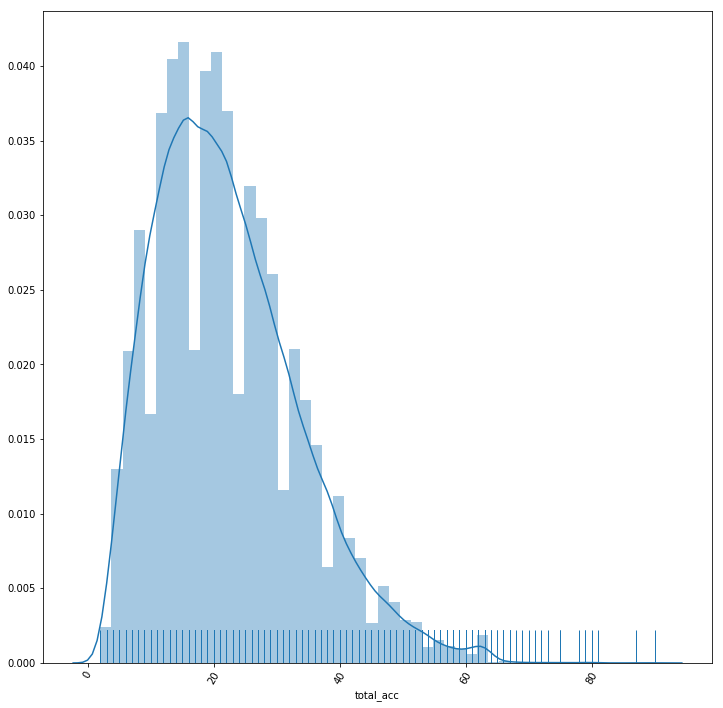

<Figure size 864x864 with 0 Axes>

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]), <a list of 9 Text xticklabel objects>)

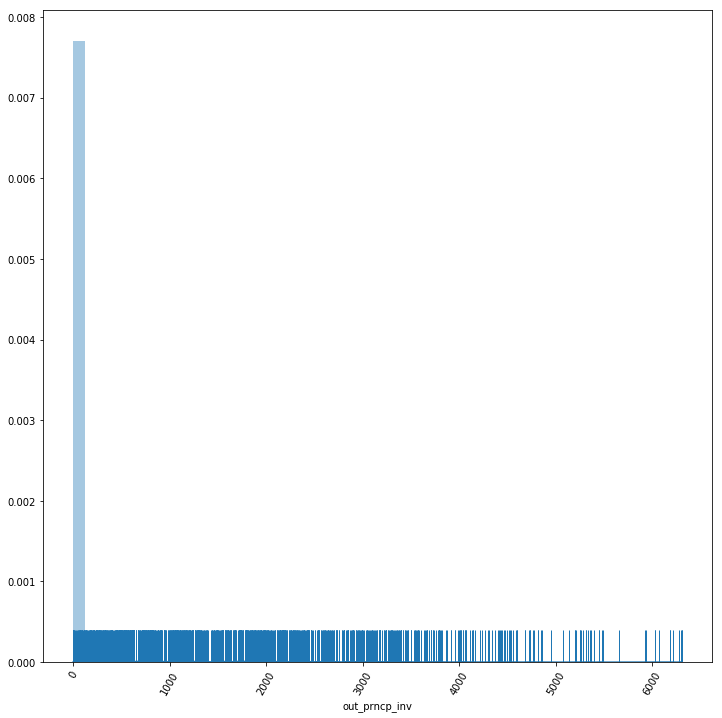

<Figure size 864x864 with 0 Axes>

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]), <a list of 9 Text xticklabel objects>)

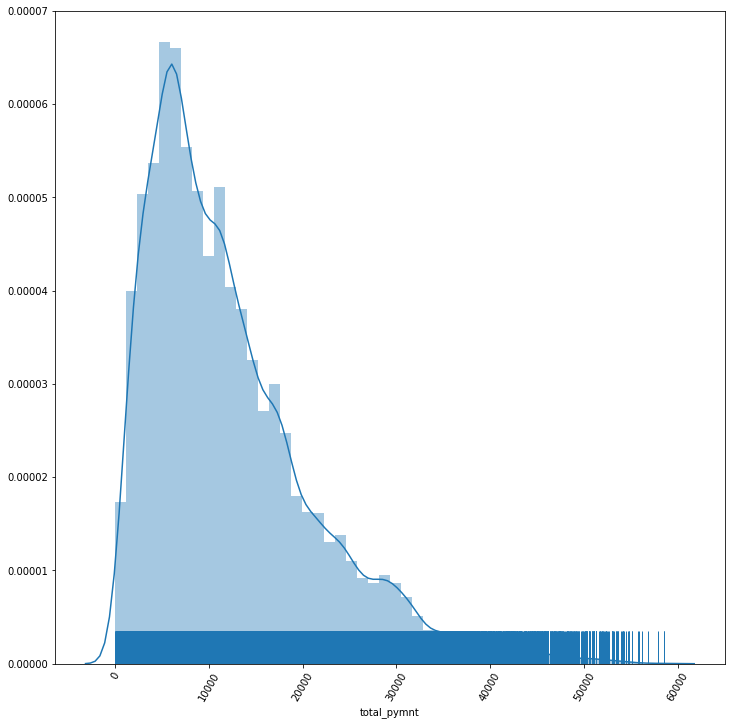

<Figure size 864x864 with 0 Axes>

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]), <a list of 9 Text xticklabel objects>)

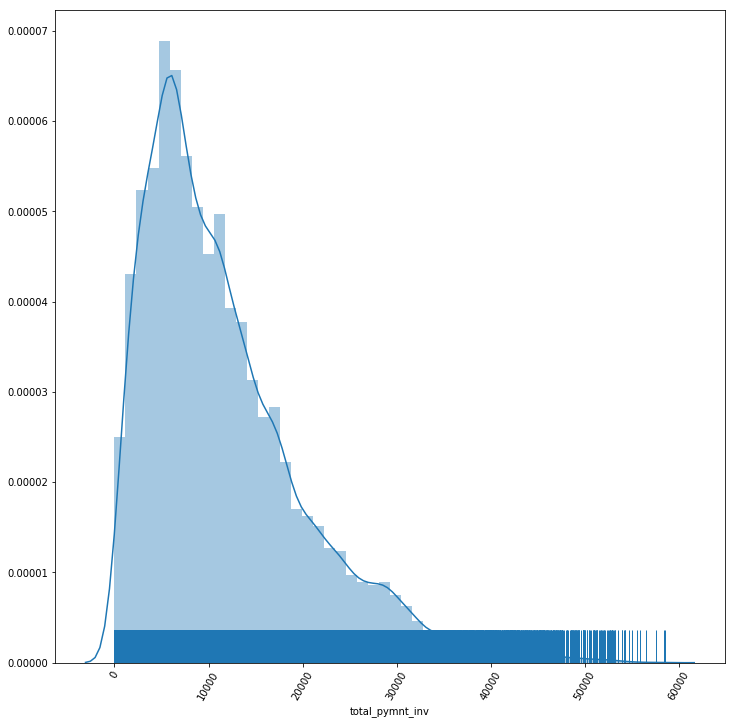

<Figure size 864x864 with 0 Axes>

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]), <a list of 10 Text xticklabel objects>)

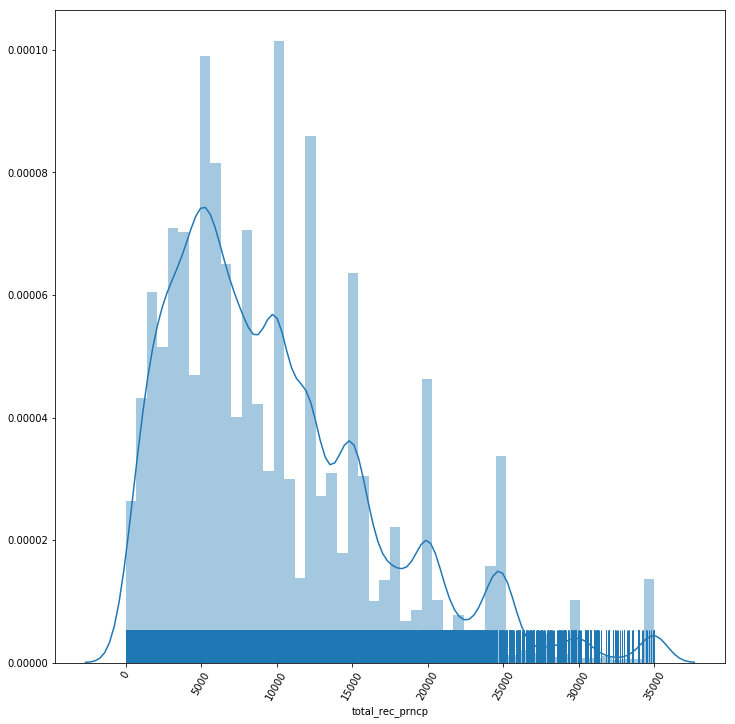

<Figure size 864x864 with 0 Axes>

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 8 Text xticklabel objects>)

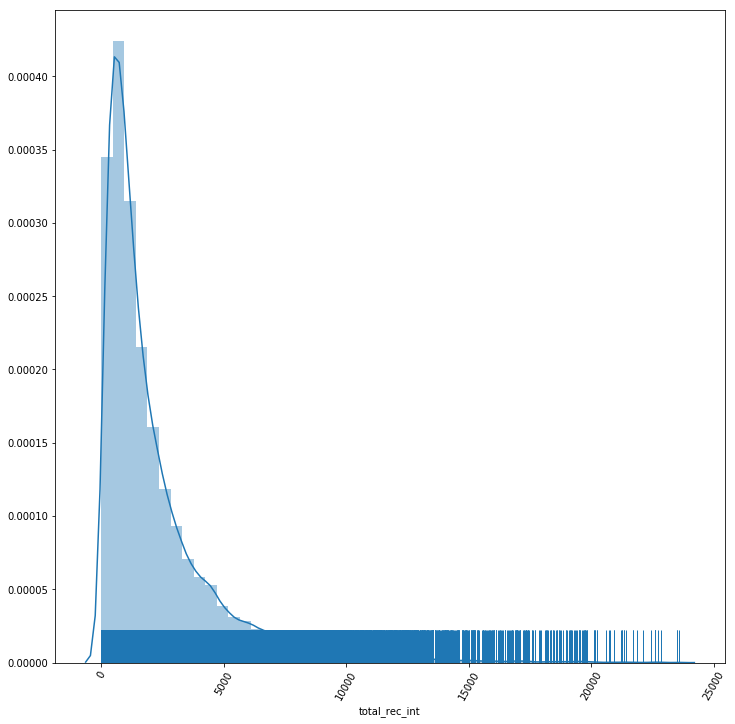

<Figure size 864x864 with 0 Axes>

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 10 Text xticklabel objects>)

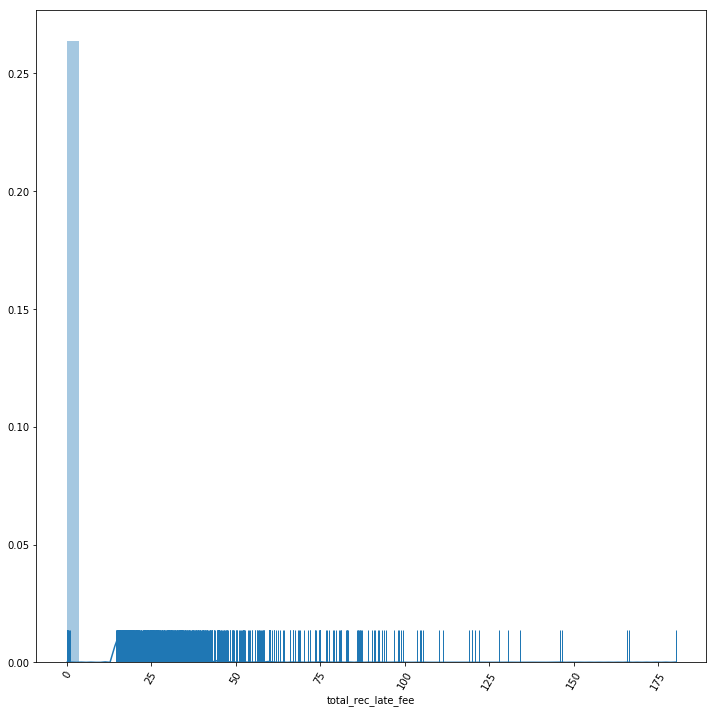

<Figure size 864x864 with 0 Axes>

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000.]), <a list of 9 Text xticklabel objects>)

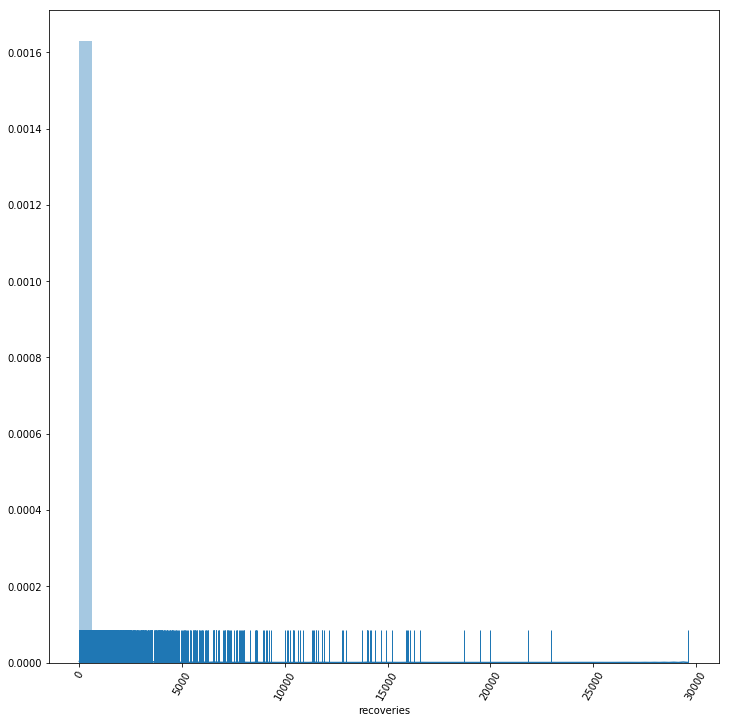

<Figure size 864x864 with 0 Axes>

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.]), <a list of 10 Text xticklabel objects>)

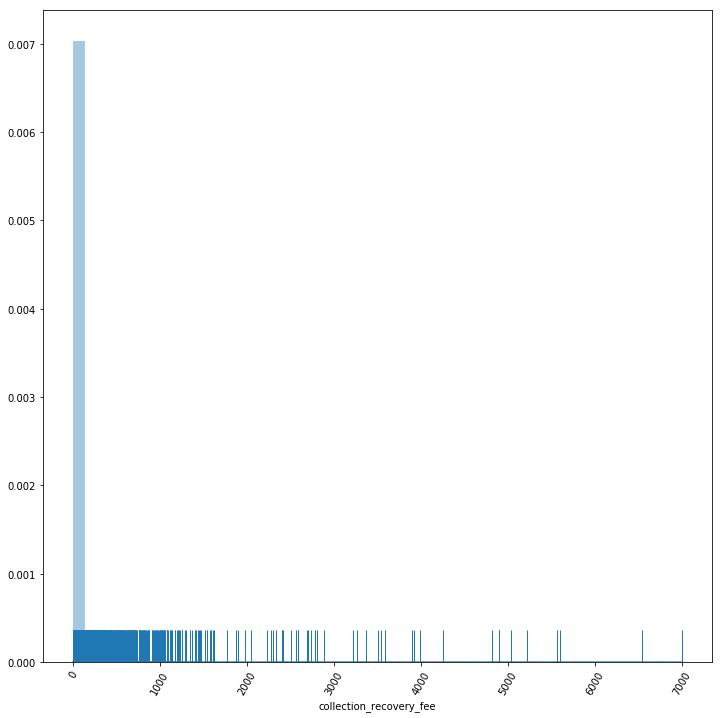

<Figure size 864x864 with 0 Axes>

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]), <a list of 10 Text xticklabel objects>)

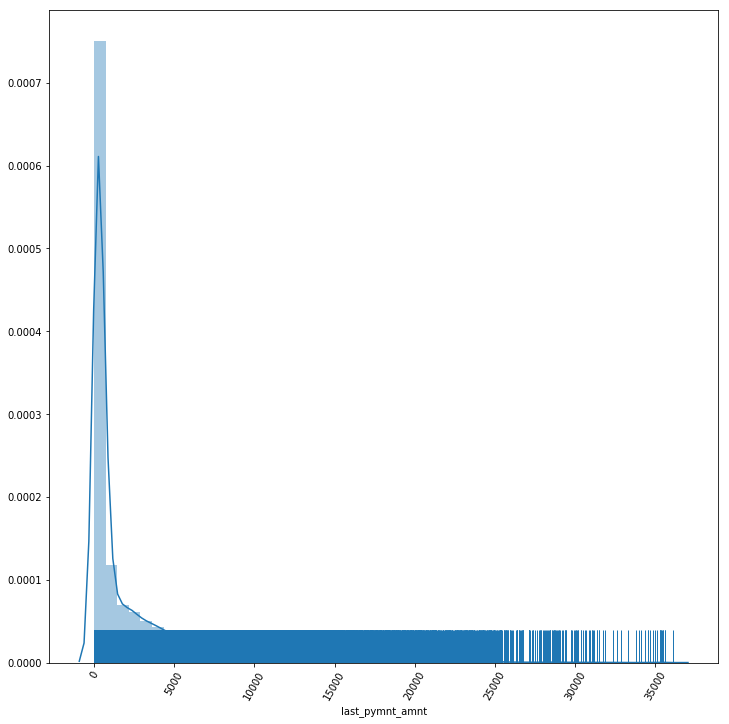

<Figure size 864x864 with 0 Axes>

/Users/santoshnirwani/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/santoshnirwani/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/santoshnirwani/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 <a list of 7 Text xticklabel objects>)

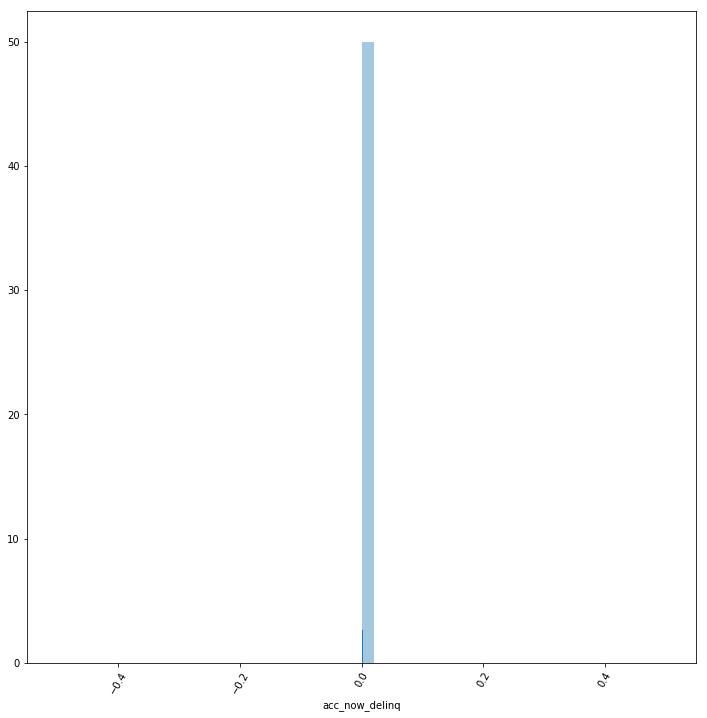

<Figure size 864x864 with 0 Axes>

(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]), <a list of 11 Text xticklabel objects>)

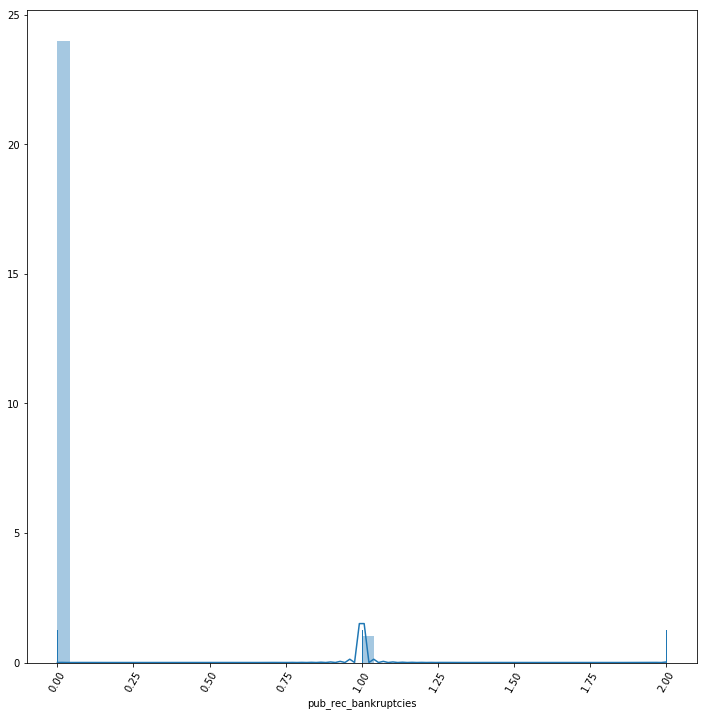

In [32]:
num_loan = loan_n.select_dtypes(include = ['int64','float64'])
#num_loan.columns
#Dropping some columns
num_loan = num_loan.drop(columns=['id','member_id','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_amnt',
                                    'policy_code','tax_liens','out_prncp'])
num_loan.info()
#num_loan.hist(figsize=(20,20),bins=50, xlabelsize=8,ylabelsize=8)
for i in num_loan.columns:
    plt.figure(figsize=(12,12))
    sns.distplot(num_loan[i],rug=True)
    plt.xticks(rotation=60)
    plt.show()